# Конструирование признаков (Feature Engineering)

---

**Источники:**

[Искусство Feature Engineering в машинном обучении](https://habr.com/ru/company/mlclass/blog/248129/)

[Конструирование признаков](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BD%D1%81%D1%82%D1%80%D1%83%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2)

[Representation: Feature Engineering](https://developers.google.com/machine-learning/crash-course/representation/feature-engineering)

[7 Feature Engineering Techniques in Machine Learning You Should Know](https://www.analyticsvidhya.com/blog/2020/10/7-feature-engineering-techniques-machine-learning/)

[Feature Engineering — deep dive into Encoding and Binning techniques](https://towardsdatascience.com/feature-engineering-deep-dive-into-encoding-and-binning-techniques-5618d55a6b38)

[Feature Engineering in Machine Learning](https://lucasxlu.github.io/blog/2018/08/20/ml-feml/)

[Binning Data with Pandas qcut and cut](https://pbpython.com/pandas-qcut-cut.html)

[Data Preprocessing with Python Pandas — Part 5 Binning](https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950)

[Category Encoders](https://contrib.scikit-learn.org/category_encoders/)

---

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy missingno scikit-learn seaborn -y

In [3]:
# !conda install -c conda-forge category_encoders -y

In [4]:
import numpy as np

np.__version__

'1.19.2'

In [5]:
import pandas as pd

pd.__version__

'1.2.3'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

## Создание `DataFrame` для примера

In [7]:
# товары в интернет магазине
df = pd.DataFrame({'user_name': pd.Series(['Mr Oleg', 'Mr Oleg',
                                           'Mr Pete', 'Mr Pete', 
                                           'Mrs Elena', 'Mr Viktor',
                                           'Mr Anton', 'Mr Anton', 
                                           'Mrs Alex', 'Mrs Alex'], 
                                          dtype='string'),
                   
                   'user_country': pd.Series(['Russia', 'Russia', 
                                              'USA', 'USA', 
                                              'India', 'Germany', 
                                              'Russia', 'Russia', 
                                              'Germany', 'Germany'], 
                                             dtype='category'), 
                   
                   'user_age': pd.Series([25, 25,
                                           66, 66, 
                                           36, 15,
                                           48, 48, 
                                           86, 86], 
                                          dtype='int8'),
                   
                  'user_rating': pd.Series(['5 star', '5 star', 
                                            '3 star', '3 star', 
                                            '1 star', '2 star', 
                                            '5 star', '5 star', 
                                            '4 star', '4 star'], 
                                           dtype=pd.CategoricalDtype(categories=['1 star', 
                                                                                 '2 star', 
                                                                                 '3 star', 
                                                                                 '4 star', 
                                                                                 '5 star'], ordered=True)),
                  'title': pd.Series(['toy', 'Beautiful Cat', 
                                      'Car', 'TV', 
                                      'Toys', 'Television', 
                                      'Smartphone', 'Dog', 
                                      'Kitty', 'Soft TOY'], 
                                     dtype='string'),
                   
                  
                   'tags': pd.Series(['children, beautiful, good_condition', 
                                      'animal, cat, beautiful', 
                                      'beautiful, good_condition', 
                                      'good_condition', 
                                      'children, animal', 
                                      'good_condition', 
                                      'good_condition', 
                                      'animal, dog', 'animal', 
                                      'children, good_condition'], 
                                     dtype='string'),
                                     
                   'item_age_month': pd.Series([1, 0, 
                                                6, 12, 
                                                3, 4, 
                                                18, 1, 
                                                9, 8], 
                                              dtype='int16'),
                   
                   'color': pd.Series(['red', 'blue', 
                                       'rainbow', 'white', 
                                       'red', 'white', 
                                       'rainbow', 'white', 
                                       'white', 'blue'], 
                                      dtype='category'),
                   
                    'open_date_time': pd.Series(['10.10.2020 18:25', '20.12.2020 16:36', 
                                                 '06.04.2021 10:14', '07.04.2021 23:25', 
                                                 '25.11.2020 06:17', '16.12.2020 15:15', 
                                                 '10.03.2021 09:08', '31.12.2020 04:57', 
                                                 '28.12.2020 12:54', '29.12.2020 23:25'], 
                                                dtype='datetime64[ns]'),
                   
                   'status': pd.Series(['sold out', 'for_sale', 
                                        'for_sale', 'for_sale', 
                                        'sold out', 'sold out', 
                                        'for_sale', 'for_sale', 
                                        'sold out', 'for_sale'], 
                                       dtype='string')
                  })

In [8]:
# отображать все колонки
pd.options.display.max_columns = None

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_name       10 non-null     string        
 1   user_country    10 non-null     category      
 2   user_age        10 non-null     int8          
 3   user_rating     10 non-null     category      
 4   title           10 non-null     string        
 5   tags            10 non-null     string        
 6   item_age_month  10 non-null     int16         
 7   color           10 non-null     category      
 8   open_date_time  10 non-null     datetime64[ns]
 9   status          10 non-null     string        
dtypes: category(3), datetime64[ns](1), int16(1), int8(1), string(4)
memory usage: 1.2 KB


In [10]:
df

user_name user_country  user_age user_rating          title  \
0    Mr Oleg       Russia        25      5 star            toy   
1    Mr Oleg       Russia        25      5 star  Beautiful Cat   
2    Mr Pete          USA        66      3 star            Car   
3    Mr Pete          USA        66      3 star             TV   
4  Mrs Elena        India        36      1 star           Toys   
5  Mr Viktor      Germany        15      2 star     Television   
6   Mr Anton       Russia        48      5 star     Smartphone   
7   Mr Anton       Russia        48      5 star            Dog   
8   Mrs Alex      Germany        86      4 star          Kitty   
9   Mrs Alex      Germany        86      4 star       Soft TOY   

                                  tags  item_age_month    color  \
0  children, beautiful, good_condition               1      red   
1               animal, cat, beautiful               0     blue   
2            beautiful, good_condition               6  rainbow   
3                       good_condition              12    white   
4                     children, animal               3      red   
5                       good_condition               4    white   
6                       good_condition              18  rainbow   
7                          animal, dog               1    white   
8                               animal               9    white   
9             children, good_condition               8     blue   

       open_date_time    status  
0 2020-10-10 18:25:00  sold out  
1 2020-12-20 16:36:00  for_sale  
2 2021-06-04 10:14:00  for_sale  
3 2021-07-04 23:25:00  for_sale  
4 2020-11-25 06:17:00  sold out  
5 2020-12-16 15:15:00  sold out  
6 2021-10-03 09:08:00  for_sale  
7 2020-12-31 04:57:00  for_sale  
8 2020-12-28 12:54:00  sold out  
9 2020-12-29 23:25:00  for_sale

### Анализ типов шкал

(см. [лекцию](../../03_data_analysis/lectures/08_statistical_data_types.ipynb))

- `user_name` - номинальная
- `user_country` - номинальная
- `user_age` - отношений
- `user_rating` - порядковая 
- `title` - номинальная
- `tags` - номинальная
- `item_age_month` - отношений
- `color` - номинальная
- `open_date_time` - интервальная
- `status` - номинальная или порядковая

In [11]:
# проверим правильно ли задан тип порядковой категории
df.item_age_month

0     1
1     0
2     6
3    12
4     3
5     4
6    18
7     1
8     9
9     8
Name: item_age_month, dtype: int16

In [12]:
# в ячейках open_date_time содержаться данные типа Timestamp
df.open_date_time[0]

Timestamp('2020-10-10 18:25:00')

[Документация по pandas.Timestamp](https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html).

In [13]:
# у Timestamp можно получить номер дня в дате
df.open_date_time[0].day

10

In [14]:
# у Timestamp можно получить день года
df.open_date_time[0].day_of_year

284

## Конструирование признаков (Feature Engineering)

<blockquote>Придумывать признаки трудно, требует много времени и глубоких знаний. «Прикладное машинное обучение», в основном, это конструирование признаков.
— Эндрю Ын </blockquote>

**Признак** — это качество или свойство, присущее всем независимым объектам, анализ или прогноз для которых производится. Любое качество может быть полезным, если оно полезно для модели.

Смысл **признака** и чем он отличается от качества, легче было бы понять в контексте задачи. **Признак является характеристикой, которая может помочь решить задачу**.

**Признаки** в данных важны для используемых прогнозных моделей и влияют на результат, который необходимо получить. **Качество и количество признаков оказывают большое влияние на качество модели, будет она хорошей или нет.**

Можно сказать, что чем лучше **признаки**, тем лучше будет результат. Это не совсем полная правда, поскольку результат будет зависеть от модели и данных, не просто от выбранных **признаков**. Но отбор правильных **признаков** остаётся очень важным делом. Более качественные **признаки** могут дать более простую и более гибкую модель и часто они дают лучшие результаты.

**Конструирование признаков** — это процесс использования предметной области данных для создания признаков, которые нужны для машинного обучения. 

**Конструирование признаков** является фундаментом для приложений машинного обучения, а также трудным и затратным процессом. Необходимости ручного конструирования признаков можно избежать при автоматизации прикладного обучения признакам.

Почти любая задача начинается с создания (Engineering) и отбора (Selection) признаков.

**Процесс конструирования признаков** — это
- Метод мозгового штурма или проверка признаков;
- Решение, какие признаки создавать;
- Создание признаков;
- Проверка, какие признаки работают с моделью;
- Улучшение признаков, если требуется;
- Возврат к методу мозгового штурма/создание других признаков, пока работа не будет завершена.


Большинство алгоритмов (или библиотек машинного обучения) дают лучший результат с числовыми признаками.

В Python для библиотеки `sklearn` требуются признаки в числовых массивах (`np.array`, `pd.DataFrame`, `pd.Series`).

## Строковые признаки

**Возможное решение:**
- В самих строках зачастую содержится информация ("Mr.", "Mrs." преобразовать в половой признак).
- Сократить количество "категорий" ("кот", "кошка", "кошечка", "котенок" -> "кот").
- Разделить строку на несколько признаков (список тегов, ФИО), если их не очень много.
- Преобразовать к другому типу ("первое января 93-го года" преобразовать в 01.01.1993).
- ...

In [15]:
df.select_dtypes(include='string')

user_name          title                                 tags    status
0    Mr Oleg            toy  children, beautiful, good_condition  sold out
1    Mr Oleg  Beautiful Cat               animal, cat, beautiful  for_sale
2    Mr Pete            Car            beautiful, good_condition  for_sale
3    Mr Pete             TV                       good_condition  for_sale
4  Mrs Elena           Toys                     children, animal  sold out
5  Mr Viktor     Television                       good_condition  sold out
6   Mr Anton     Smartphone                       good_condition  for_sale
7   Mr Anton            Dog                          animal, dog  for_sale
8   Mrs Alex          Kitty                               animal  sold out
9   Mrs Alex       Soft TOY             children, good_condition  for_sale

### Получить информацию из строки

ВНИМАНИЕ: Требуется понимание предметной области!

In [16]:
# предположим, что может быть только Mr или Mrs, тогда можно
# создать колонку (bool) определяющую пол пользователя
df['user_sex'] = df.user_name.str.contains("Mrs")

# False = Мужчина / True = Женщина
df.user_sex

0    False
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8     True
9     True
Name: user_sex, dtype: boolean

### Сократить количество "категорий"

ВНИМАНИЕ: Требуется понимание предметной области!

*Может потребовать задействитвовать другие модели для получения похожих данных для группировки.

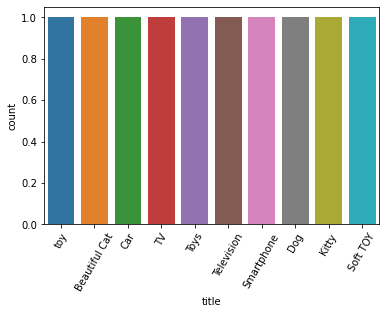

In [17]:
# какие наименования имеются?
g = sns.countplot(x=df.title)
_ = g.set_xticklabels(g.get_xticklabels(), rotation=60)

In [18]:
# сформировать, что заменяем и на что
toy_replacement = dict.fromkeys(['toy', 'Toys', 'Soft TOY'], 'Toy')
toy_replacement

{'toy': 'Toy', 'Toys': 'Toy', 'Soft TOY': 'Toy'}

In [19]:
# сформировать, что заменяем и на что
cat_replacement = dict.fromkeys(['Beautiful Cat', 'Kitty'], 'Cat')
cat_replacement

{'Beautiful Cat': 'Cat', 'Kitty': 'Cat'}

In [20]:
# создать новую колонку с замененными значениями
df['title_grouped'] = df.title.replace(to_replace=toy_replacement).replace(to_replace=cat_replacement).replace(to_replace='Television', value='TV')

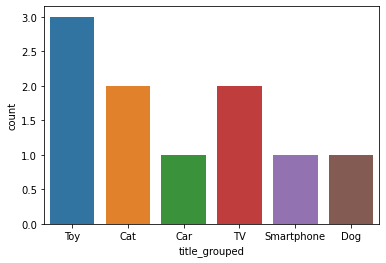

In [21]:
_ = sns.countplot(x=df.title_grouped)

### Разделить строку на несколько признаков

ВНИМАНИЕ: Требуется понимание предметной области!

In [22]:
df.tags

0    children, beautiful, good_condition
1                 animal, cat, beautiful
2              beautiful, good_condition
3                         good_condition
4                       children, animal
5                         good_condition
6                         good_condition
7                            animal, dog
8                                 animal
9               children, good_condition
Name: tags, dtype: string

In [23]:
# в параметр index попадает список тегов (разделенных), к ним добавляется префикс tag_
# метод apply применяется для каждой строки и возвращает DataFrame
tags_df = df.tags.apply(lambda x: pd.Series(True, index=[f'tag_{tag}' for tag in x.split(", ")]))
tags_df

tag_children tag_beautiful tag_good_condition tag_animal tag_cat tag_dog
0         True          True               True        NaN     NaN     NaN
1          NaN          True                NaN       True    True     NaN
2          NaN          True               True        NaN     NaN     NaN
3          NaN           NaN               True        NaN     NaN     NaN
4         True           NaN                NaN       True     NaN     NaN
5          NaN           NaN               True        NaN     NaN     NaN
6          NaN           NaN               True        NaN     NaN     NaN
7          NaN           NaN                NaN       True     NaN    True
8          NaN           NaN                NaN       True     NaN     NaN
9         True           NaN               True        NaN     NaN     NaN

In [24]:
# все незаполненные значения (NA) заменяются на False
tags_df = tags_df.fillna(False)
tags_df

tag_children  tag_beautiful  tag_good_condition  tag_animal  tag_cat  \
0          True           True                True       False    False   
1         False           True               False        True     True   
2         False           True                True       False    False   
3         False          False                True       False    False   
4          True          False               False        True    False   
5         False          False                True       False    False   
6         False          False                True       False    False   
7         False          False               False        True    False   
8         False          False               False        True    False   
9          True          False                True       False    False   

   tag_dog  
0    False  
1    False  
2    False  
3    False  
4    False  
5    False  
6    False  
7     True  
8    False  
9    False

In [25]:
# присоединить колонки с тегами к df
df = df.join(tags_df)

### Преобразовать к другому типу

ВНИМАНИЕ: Требуется понимание предметной области!

In [26]:
df.status

0    sold out
1    for_sale
2    for_sale
3    for_sale
4    sold out
5    sold out
6    for_sale
7    for_sale
8    sold out
9    for_sale
Name: status, dtype: string

In [27]:
df['is_sold_out'] = df.status.map({'sold out': True, 'for_sale': False})
df

user_name user_country  user_age user_rating          title  \
0    Mr Oleg       Russia        25      5 star            toy   
1    Mr Oleg       Russia        25      5 star  Beautiful Cat   
2    Mr Pete          USA        66      3 star            Car   
3    Mr Pete          USA        66      3 star             TV   
4  Mrs Elena        India        36      1 star           Toys   
5  Mr Viktor      Germany        15      2 star     Television   
6   Mr Anton       Russia        48      5 star     Smartphone   
7   Mr Anton       Russia        48      5 star            Dog   
8   Mrs Alex      Germany        86      4 star          Kitty   
9   Mrs Alex      Germany        86      4 star       Soft TOY   

                                  tags  item_age_month    color  \
0  children, beautiful, good_condition               1      red   
1               animal, cat, beautiful               0     blue   
2            beautiful, good_condition               6  rainbow   
3                       good_condition              12    white   
4                     children, animal               3      red   
5                       good_condition               4    white   
6                       good_condition              18  rainbow   
7                          animal, dog               1    white   
8                               animal               9    white   
9             children, good_condition               8     blue   

       open_date_time    status  user_sex title_grouped  tag_children  \
0 2020-10-10 18:25:00  sold out     False           Toy          True   
1 2020-12-20 16:36:00  for_sale     False           Cat         False   
2 2021-06-04 10:14:00  for_sale     False           Car         False   
3 2021-07-04 23:25:00  for_sale     False            TV         False   
4 2020-11-25 06:17:00  sold out      True           Toy          True   
5 2020-12-16 15:15:00  sold out     False            TV         False   
6 2021-10-03 09:08:00  for_sale     False    Smartphone         False   
7 2020-12-31 04:57:00  for_sale     False           Dog         False   
8 2020-12-28 12:54:00  sold out      True           Cat         False   
9 2020-12-29 23:25:00  for_sale      True           Toy          True   

   tag_beautiful  tag_good_condition  tag_animal  tag_cat  tag_dog  \
0           True                True       False    False    False   
1           True               False        True     True    False   
2           True                True       False    False    False   
3          False                True       False    False    False   
4          False               False        True    False    False   
5          False                True       False    False    False   
6          False                True       False    False    False   
7          False               False        True    False     True   
8          False               False        True    False    False   
9          False                True       False    False    False   

   is_sold_out  
0         True  
1        False  
2        False  
3        False  
4         True  
5         True  
6        False  
7        False  
8         True  
9        False

## Категориальные признаки

**Пример:**
Цвет (color), т.е. синий (blue), красный (red), зеленый (green).


**Возможное решение:**
- Добавить комбинации признаков вида "is_red", "is_blue", "is_green", "is_red_or_blue" и т.п.
- Разбиение на интервалы (Binning = `map`/`replace`).
- Категория -> число (`map`, `replace`, `Dummies`, `OrdinalEncoder`, `LabelEncoder`, `BinaryEncoder`, `OneHotEncoder` и [другие](https://contrib.scikit-learn.org/category_encoders/)).
- Заменить признаки на их количество (`CountEncoder`).
- `TargetEncoder`.
- `CatBoostEncoder`.

### Комбинации признаков

In [28]:
df.color.value_counts()

white      4
blue       2
rainbow    2
red        2
Name: color, dtype: int64

In [29]:
df['is_white'] = df.color == 'white'
df['is_blue'] = df.color == 'blue'
df['is_rainbow'] = df.color == 'rainbow'
df['is_red'] = df.color == 'red'

In [30]:
df['is_color_white_or_blue'] = (df.color == 'white') | (df.color == 'blue')
df['is_color_rainbow_or_red'] = (df.color == 'rainbow') | (df.color == 'red')

In [31]:
df

user_name user_country  user_age user_rating          title  \
0    Mr Oleg       Russia        25      5 star            toy   
1    Mr Oleg       Russia        25      5 star  Beautiful Cat   
2    Mr Pete          USA        66      3 star            Car   
3    Mr Pete          USA        66      3 star             TV   
4  Mrs Elena        India        36      1 star           Toys   
5  Mr Viktor      Germany        15      2 star     Television   
6   Mr Anton       Russia        48      5 star     Smartphone   
7   Mr Anton       Russia        48      5 star            Dog   
8   Mrs Alex      Germany        86      4 star          Kitty   
9   Mrs Alex      Germany        86      4 star       Soft TOY   

                                  tags  item_age_month    color  \
0  children, beautiful, good_condition               1      red   
1               animal, cat, beautiful               0     blue   
2            beautiful, good_condition               6  rainbow   
3                       good_condition              12    white   
4                     children, animal               3      red   
5                       good_condition               4    white   
6                       good_condition              18  rainbow   
7                          animal, dog               1    white   
8                               animal               9    white   
9             children, good_condition               8     blue   

       open_date_time    status  user_sex title_grouped  tag_children  \
0 2020-10-10 18:25:00  sold out     False           Toy          True   
1 2020-12-20 16:36:00  for_sale     False           Cat         False   
2 2021-06-04 10:14:00  for_sale     False           Car         False   
3 2021-07-04 23:25:00  for_sale     False            TV         False   
4 2020-11-25 06:17:00  sold out      True           Toy          True   
5 2020-12-16 15:15:00  sold out     False            TV         False   
6 2021-10-03 09:08:00  for_sale     False    Smartphone         False   
7 2020-12-31 04:57:00  for_sale     False           Dog         False   
8 2020-12-28 12:54:00  sold out      True           Cat         False   
9 2020-12-29 23:25:00  for_sale      True           Toy          True   

   tag_beautiful  tag_good_condition  tag_animal  tag_cat  tag_dog  \
0           True                True       False    False    False   
1           True               False        True     True    False   
2           True                True       False    False    False   
3          False                True       False    False    False   
4          False               False        True    False    False   
5          False                True       False    False    False   
6          False                True       False    False    False   
7          False               False        True    False     True   
8          False               False        True    False    False   
9          False                True       False    False    False   

   is_sold_out  is_white  is_blue  is_rainbow  is_red  is_color_white_or_blue  \
0         True     False    False       False    True                   False   
1        False     False     True       False   False                    True   
2        False     False    False        True   False                   False   
3        False      True    False       False   False                    True   
4         True     False    False       False    True                   False   
5         True      True    False       False   False                    True   
6        False     False    False        True   False                   False   
7        False      True    False       False   False                    True   
8         True      True    False       False   False                    True   
9        False     False     True       False   False                    True   

   is_color_rainbow_or_red  
0                     True  
1            

### Группировка категориальных признаков и формирование "интервалов" (Binning/Discretization)

При использовании категориальных признаков можно столкнуться с такими проблемами:
- редкие метки (rare labels), 
- категории / группы, которые крайне редко встречаются в наборе данных. 

Эти проблемы часто связаны с признаками, имеющими высокую мощность (high cardinality) - другими словами, с большим количеством различных категорий.

Слишком много категорий, особенно редких, приводит к зашумлению набора данных.

Алгоритму ML может быть сложно преодолеть этот шум и учиться на более значимых сигналах в данных.

Высокая кардинальность также может усугубить [проклятие размерности (curse of dimensionality)](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%BE%D0%BA%D0%BB%D1%8F%D1%82%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8), если выбрать `OneHotEncoder` для таких категориальных признаков. Таким образом, если исходная переменная имеет 50 различных категорий, то добавляется 49 столбцов в набор данных.

Наличие слишком большого количества категорий также может привести к проблемам при обучении и тестировании модели. Вполне возможно, что категория появится в тестовом наборе, но не в обучающем наборе. Модель не знает, как обращаться с этой категорией, потому что она никогда ее раньше не "видела".

Один из способов решения этих проблем - разработка новых признаков с меньшим количеством категорий. Это может быть выполнено путем объединения (группировки) нескольких категорий в одну категорию.

In [32]:
df.title

0              toy
1    Beautiful Cat
2              Car
3               TV
4             Toys
5       Television
6       Smartphone
7              Dog
8            Kitty
9         Soft TOY
Name: title, dtype: string

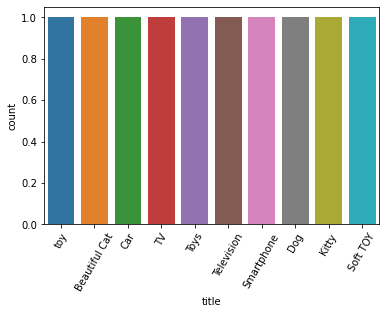

In [33]:
# какие наименования имеются?
g = sns.countplot(x=df.title)
_ = g.set_xticklabels(g.get_xticklabels(), rotation=60)

In [34]:
# сформировать, что заменяем и на что
animal_mapping = dict.fromkeys(['Beautiful Cat', 'Dog', 'Kitty'], 'Animal')
toy_mapping = dict.fromkeys(['toy', 'Toys', 'Soft TOY'], 'Toy')
electronic_mapping = dict.fromkeys(['TV', 'Television', 'Smartphone'], 'Electronic')

animal_mapping, toy_mapping, electronic_mapping

({'Beautiful Cat': 'Animal', 'Dog': 'Animal', 'Kitty': 'Animal'},
 {'toy': 'Toy', 'Toys': 'Toy', 'Soft TOY': 'Toy'},
 {'TV': 'Electronic', 'Television': 'Electronic', 'Smartphone': 'Electronic'})

In [35]:
all_mapping = {}
all_mapping.update(animal_mapping)
all_mapping.update(toy_mapping)
all_mapping.update(electronic_mapping)

all_mapping

{'Beautiful Cat': 'Animal',
 'Dog': 'Animal',
 'Kitty': 'Animal',
 'toy': 'Toy',
 'Toys': 'Toy',
 'Soft TOY': 'Toy',
 'TV': 'Electronic',
 'Television': 'Electronic',
 'Smartphone': 'Electronic'}

In [36]:
# создать новую колонку с замененными значениями
df['title_bins'] = df.title.map(all_mapping)
df.title_bins

0           Toy
1        Animal
2           NaN
3    Electronic
4           Toy
5    Electronic
6    Electronic
7        Animal
8        Animal
9           Toy
Name: title_bins, dtype: object

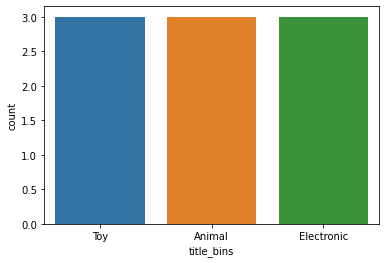

In [37]:
_ = sns.countplot(x=df.title_bins)

### Replace

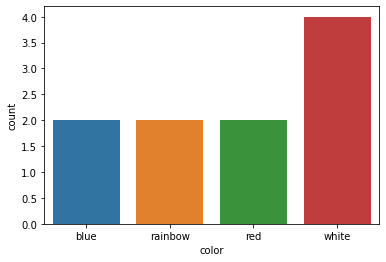

In [38]:
_ = sns.countplot(x=df.color)

In [39]:
color_replacement = {name: num for num, name in enumerate(df.color.value_counts().index)}
color_replacement

{'white': 0, 'blue': 1, 'rainbow': 2, 'red': 3}

In [40]:
# ВНИМАНИЕ: не удаляет значения, которые не указаны в replace
df['color_nums'] = df.color.replace(color_replacement)

In [41]:
df[['color', 'color_nums']]

color  color_nums
0      red           3
1     blue           1
2  rainbow           2
3    white           0
4      red           3
5    white           0
6  rainbow           2
7    white           0
8    white           0
9     blue           1

### Map

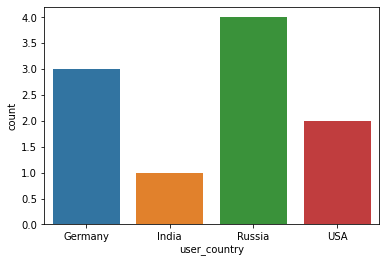

In [42]:
_ = sns.countplot(x=df.user_country)

In [43]:
user_country_mapping = {name: num for num, name in enumerate(df.user_country.value_counts().index)}
user_country_mapping

{'Russia': 0, 'Germany': 1, 'USA': 2, 'India': 3}

In [44]:
# ВНИМАНИЕ: удаляет значения, которые не указаны в map
df['user_country_nums'] = df.user_country.map(user_country_mapping)

In [45]:
df[['user_country', 'user_country_nums']]

user_country user_country_nums
0       Russia                 0
1       Russia                 0
2          USA                 2
3          USA                 2
4        India                 3
5      Germany                 1
6       Russia                 0
7       Russia                 0
8      Germany                 1
9      Germany                 1

### Dummies

- `pd.get_dummies` приводит к матрице `Pandas DataFrame`, тогда как `OneHotEncoder` приводит к матрице `SciPy CSR`.

- `pd.get_dummies` намного быстрее, чем `OneHotEncoder`.

- `OneHotEncoder` не может обрабатывать строковые значения напрямую. Если номинальные характеристики представляют собой строки, необходимо сначала сопоставить их с целыми числами.

- `pandas.get_dummies` - полная противоположность. По умолчанию он преобразует только строковые столбцы в `one-hot` представление, если столбцы не указаны.

- Суть в том, что кодировщик `OneHotEncoder` создает функцию, которая сохраняется и затем может применяться к новым наборам данных, которые используют те же категориальные переменные, с согласованными результатами.

- С другой стороны, с `sklearn.OneHotEncoder`, после того как мы создали кодировщик, мы можем повторно использовать его для получения одного и того же вывода каждый раз, со столбцами только для "красного" и "зеленого".

Невозможно явно контролировать, что происходит, когда встречается новый "синий": если предполагается, что это невозможно, то можно указать, чтобы он выдал ошибку с помощью `handle_unknown = "error"`; в противном случае мы можем сказать ему продолжить и просто установить красный и зеленый столбцы в 0 с помощью `handle_unknown = "ignore"`.

In [46]:
dummies = pd.get_dummies(df[cat_features])
dummies

NameError: name 'cat_features' is not defined

In [ ]:
new_df = df_num.join(dummies)
new_df

### OrdinalEncoder

### LabelEncoder

Объект `LabelEncoder` присваивает каждому уникальному значению отдельное целое число.

<img src="images/label_encoder_example.png"/>

Этот подход **предполагает упорядочение категорий**:

`Никогда (0) < Редко (1) < Большинство дней (2) < Каждый день (3)`.

Это предположение имеет смысл в этом примере, потому что существует неоспоримое ранжирование категорий.

Не все категориальные переменные имеют четкий порядок значений, но мы называем те, которые имеют **порядковыми переменными**.

Для моделей на основе деревьев (таких, как деревья решений = `decision trees` и случайные леса = `random forests`) можно ожидать, что кодирование меток будет хорошо работать с порядковыми переменными.

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoded = df[cat_features].apply(encoder.fit_transform)
encoded

In [ ]:
new_df = df_num.join(encoded)
new_df

### OneHotEncoder

При использовании `OneHotEncoder` создаются новые столбцы, указывающие на наличие (или отсутствие) каждого возможного значения в исходных данных.

<img src="images/one_hot_encoder_example.png" />

В исходном наборе данных "Цвет" - это категориальная переменная с тремя категориями: "Красный", "Желтый" и "Зеленый".

Соответствующий `OneHotEncoder` содержит один столбец для каждого возможного значения и одну строку для каждой строки в исходном наборе данных.

Если исходным значением было "Красный", помещаем 1 в столбец "Красный"; если исходным значением было "Желтый", мы помещаем 1 в столбец "Желтый" и так далее.

В отличие от `LabelEncoder`, `OneHotEncoder` **не предполагает упорядочивания категорий**.

Таким образом, вы можете ожидать, что этот подход будет работать особенно хорошо, если в категориальных данных *нет четкого упорядочения* (например, "Красный" не больше и не меньше, чем "Желтый").

Категориальные переменные без внутреннего ранжирования называют **номинальными переменными**.

Объект `OneHotEncoder` обычно работает не очень хорошо, если категориальная переменная принимает большое количество значений (т.е. обычно не следует использовать его для переменных, принимающих более 15 различных значений).

In [ ]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_encoded = OH_encoder.fit_transform(df[cat_features])
OH_encoded

In [ ]:
column_names = OH_encoder.get_feature_names(cat_features)
column_names

In [ ]:
OH_encoded_with_names = pd.DataFrame(OH_encoded, columns=column_names)
OH_encoded_with_names

In [ ]:
new_df = df_num.join(OH_encoded_with_names)
new_df

### CountEncoder

Заменяет каждое категориальное значение количеством раз, сколько оно появляется в наборе данных.

Необходимо установить пакет [Category Encoders](http://contrib.scikit-learn.org/category_encoders/)

In [ ]:
!pip -V

In [ ]:
!conda install -c conda-forge category_encoders -y

In [ ]:
import category_encoders as ce

count_enc = ce.CountEncoder()

count_encoded = count_enc.fit_transform(df[cat_features])
count_encoded

In [ ]:
new_df = df_num.join(count_encoded.add_suffix("_count"))
new_df

### TargetEncoder

Заменяет категориальное значение средним значением для этого признака.

Например, учитывая дано значение для страны "RU", вычислите средний доход для всех строк с country == "RU", допустим 0.28.

Необходимо установить пакет [Category Encoders](http://contrib.scikit-learn.org/category_encoders/)

In [ ]:
import category_encoders as ce

target_enc = ce.TargetEncoder(cols=cat_features)

train_df = df.copy()

target_enc = target_enc.fit_transform(train_df[cat_features], train_df['CO2EMISSIONS'])
target_enc

In [ ]:
new_df = df_num.join(target_enc.add_suffix("_target"))
new_df

### CatBoostEncoder

Похож на `TargetEncoder` в том смысле, что оно основано на целевой вероятности (target probability) для данного значения. Однако с `CatBoostEncoder` для каждой строки целевая вероятность вычисляется только из строк перед ней.

Необходимо установить пакет [Category Encoders](http://contrib.scikit-learn.org/category_encoders/)

In [ ]:
import category_encoders as ce

target_enc = ce.CatBoostEncoder(cols=cat_features)

train_df = df.copy()

target_enc = target_enc.fit_transform(train_df[cat_features], train_df['CO2EMISSIONS'])
target_enc

In [ ]:
new_df = df_num.join(target_enc.add_suffix("_cb"))
new_df

## Числовые признаки

**Возможное решение:**
- Округление или разделение на целую и вещественную часть (+ нормализация).
- Приведение числового признака в категориальный (Binning). Пример: добавить признаки вида "рост больше X", "рост меньше X".

<img src="images/feature_engineering.png">

## Дата и время

**Возможное решение:**
- Добавить признаки, соответствующие 
    - времени дня
    - количеству прошедшего времени с определенного момента
    - выделение сезонов, времен года, кварталов, праздничных дней
    - состояние погоды для этих дней (может быть в дождливые дни поведение покупателей меняется?)
- Разделение времени на часы, минуты и секунды (если время дано в Unix-Time или ISO формате). 

## Результаты других алгоритмов

Если решается задача классификации, можно сначала решить вспомогательную задачу кластеризации, и в качестве признака в первоначальной задаче взять кластер объекта.

Это обычно происходит на основе первичного анализа данных в случае, когда объекты хорошо кластеризуются.

## Агрегированные признаки

Признаки, которые агрегируют признаки некоторого объекта, тем самым также сокращая размерность признакового описания.

Полезно в задачах, в которых один объект содержит несколько однотипных параметров.

Например, человек, имеющий несколько автомобилей разной стоимости. В данном случае можно рассмотреть признаки, соответствующие максимальной/минимальной/средней стоимости автомобиля этого человека.

## *Добавление новых признаков

Чтобы эффективно решить задачу, необходимо быть экспертом в конкретной области и понимать, что влияет на конкретную целевую переменную. 

## Рекомендации

- Избегайте редко используемых дискретных значений признаков.
    - Хорошие значения характеристик должны появляться в наборе данных более 5 раз.
    - И наоборот, если значение появляется только один раз или очень редко, модель не может делать прогнозы на основе этого значения признака.
- Стремитесь к ясным и очевидным значениям.
    - Каждый признак должен иметь ясное и очевидное значение для всех участников проекта. 
- Учитывайте нестабильность входящего потока.
    - Определение признака не должно менять со временем.
    - Но при получении значения с помощью другой модели сопряжено с дополнительными трудностями.
- Чаще всего необходимо избавиться от дублирующих строк.